In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
sherlock = niidb.FMriActivationsDb('data/sherlock.db')

In [5]:
dtfa = DTFA.DeepTFA(sherlock.all(), mask='/data/eli/sherlock/movie_files/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

06/18/2018 12:33:57 Loading Nifti image /data/eli/sherlock/movie_files/sherlock_movie_s10.nii with mask /data/eli/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/18/2018 12:34:08 Loading Nifti image /data/eli/sherlock/movie_files/sherlock_movie_s13.nii with mask /data/eli/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/18/2018 12:34:20 Loading Nifti image /data/eli/sherlock/movie_files/sherlock_movie_s2.nii with mask /data/eli/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/18/2018 12:34:31 Loading Nifti image /data/eli/sherlock/movie_files/sherlock_movie_s15.nii with mask /data/eli/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/18/2018 12:34:42 Loading Nifti image /data/eli/sherlock/movie_files/sherlock_movie_s17.nii with mask /data/eli/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/18/2018 12:34:53 Loading Nifti image /data/eli/sherlock/movie_files/sherlock_movie_s14.nii with mask /data/eli/sherlock/movie_files/wholebrain.nii.gz (zscore=

In [6]:
dtfa.load_state('data/sherlock_k100_n700_06172018_110624')

This next cell works around an apparent bug in PyTorch, due to which the per-block weight distributions weren't being loaded properly.

In [7]:
import torch

guide_state = torch.load('data/sherlock_k100_n700_06172018_110624.dtfa_guide')
dtfa.variational.hyperparams.block__weights__mu.data = guide_state['hyperparams.block__weights__mu']
dtfa.variational.hyperparams.block__weights__sigma.data = guide_state['hyperparams.block__weights__sigma']

In [8]:
def task_labeler(b):
    return b.task

def rest_task_labeler(b):
    if b.task == 'rest':
        return 'Rest'
    else:
        return 'Task'

06/18/2018 12:39:22 Plotting factors for Participant 5, run 2


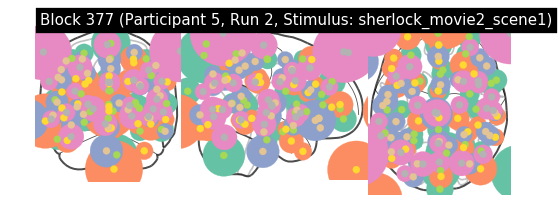

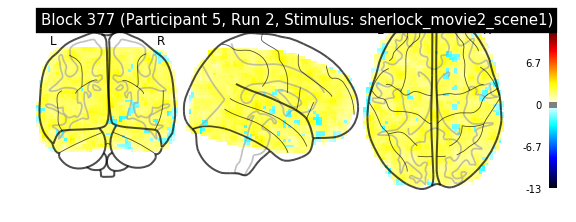

06/18/2018 12:39:28 Reconstruction Error (Frobenius Norm): 1.41388647e+03 out of 1.55409058e+03


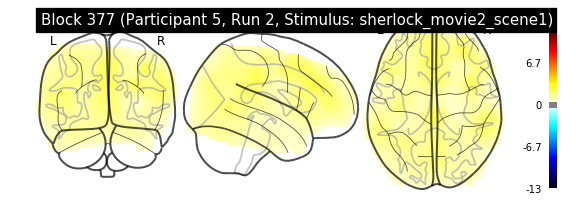

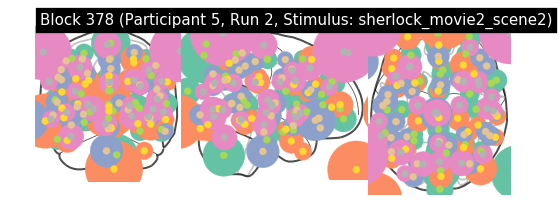

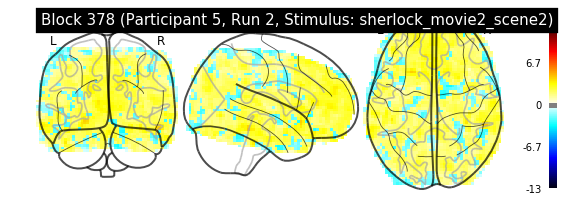

06/18/2018 12:39:37 Reconstruction Error (Frobenius Norm): 1.85199658e+03 out of 1.88971960e+03


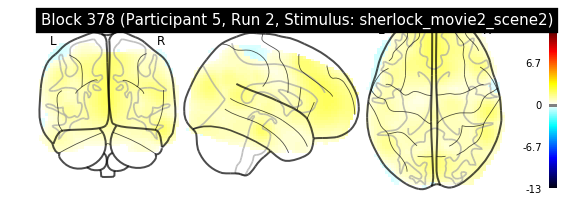

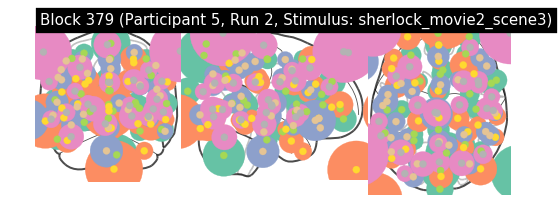

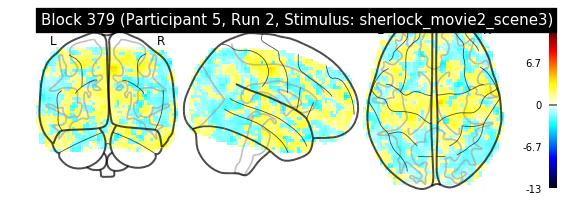

06/18/2018 12:39:48 Reconstruction Error (Frobenius Norm): 2.05145288e+03 out of 2.06982642e+03


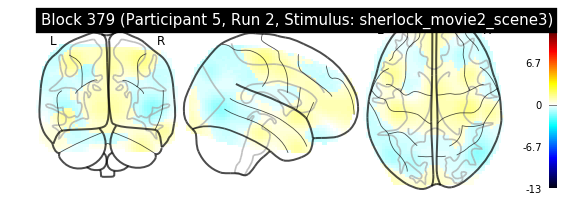

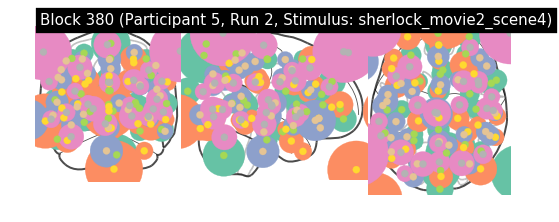

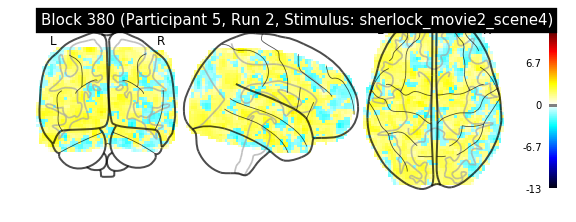

06/18/2018 12:39:53 Reconstruction Error (Frobenius Norm): 8.59922607e+02 out of 9.25079773e+02


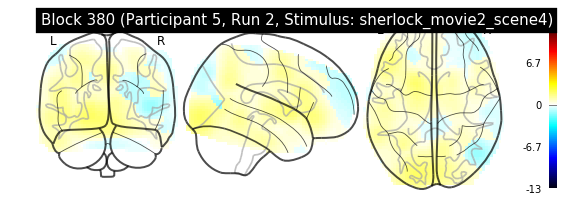

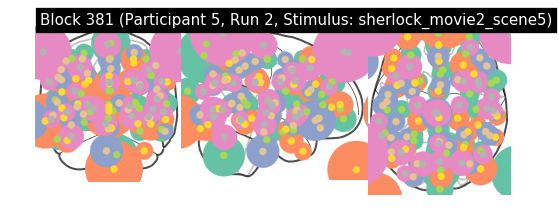

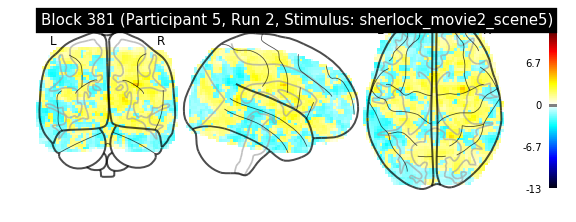

06/18/2018 12:40:02 Reconstruction Error (Frobenius Norm): 1.65973828e+03 out of 1.67622864e+03


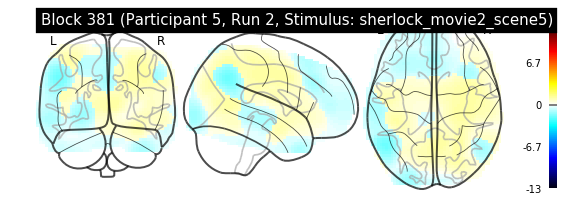

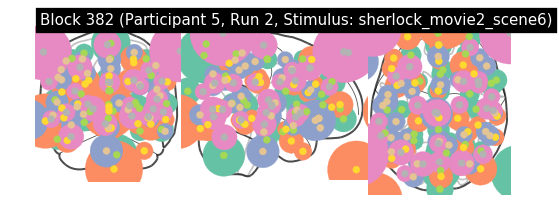

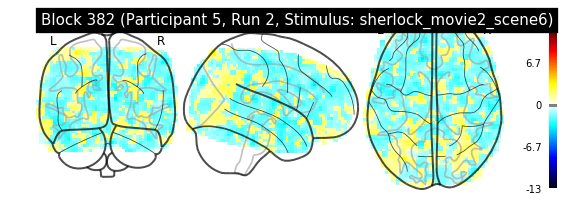

06/18/2018 12:40:15 Reconstruction Error (Frobenius Norm): 2.46313843e+03 out of 2.44447314e+03


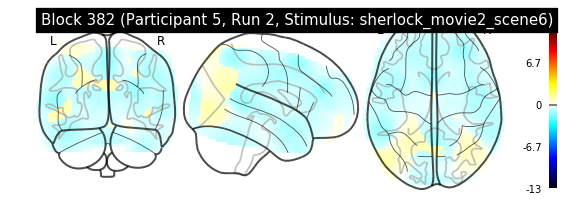

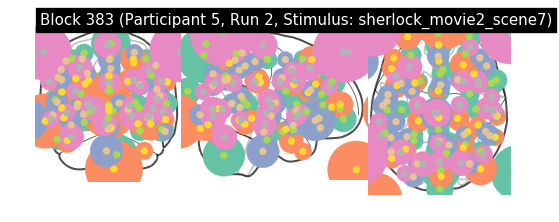

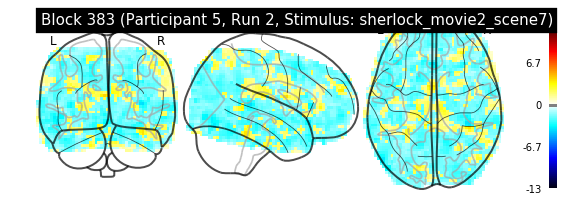

06/18/2018 12:40:25 Reconstruction Error (Frobenius Norm): 1.68193774e+03 out of 1.68273633e+03


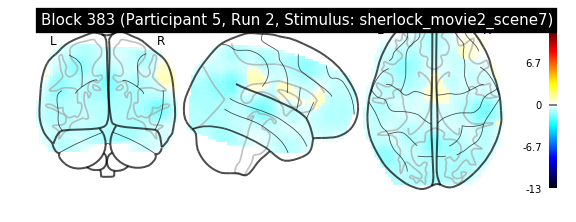

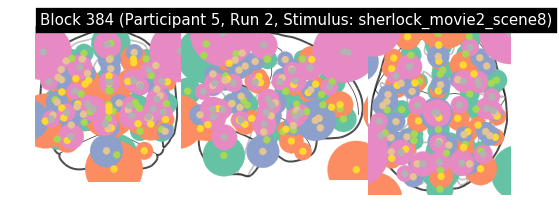

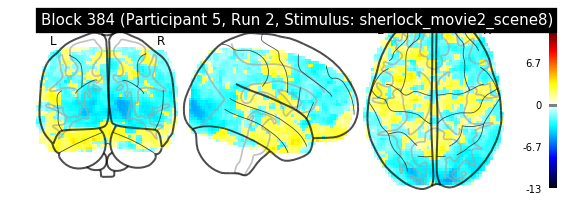

06/18/2018 12:40:36 Reconstruction Error (Frobenius Norm): 2.06632129e+03 out of 2.05374316e+03


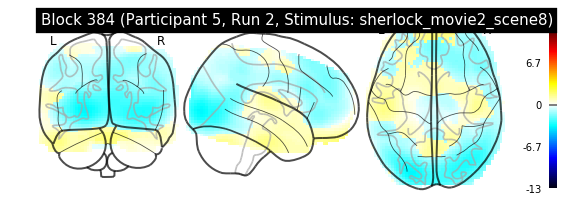

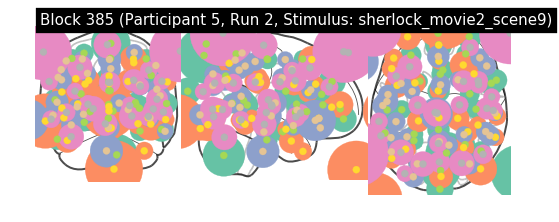

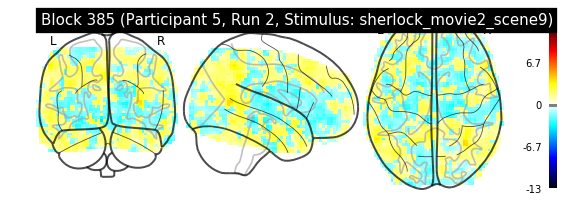

06/18/2018 12:40:49 Reconstruction Error (Frobenius Norm): 2.11381421e+03 out of 2.08159033e+03


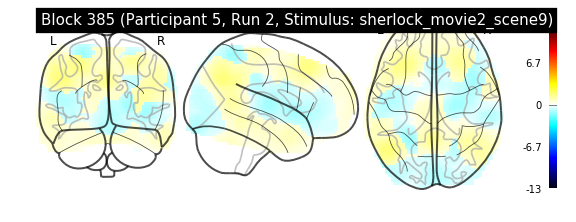

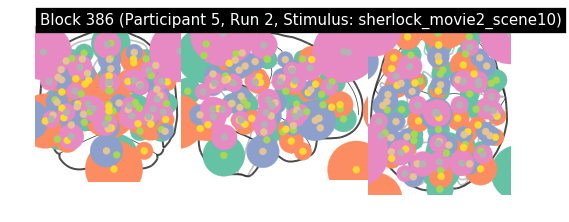

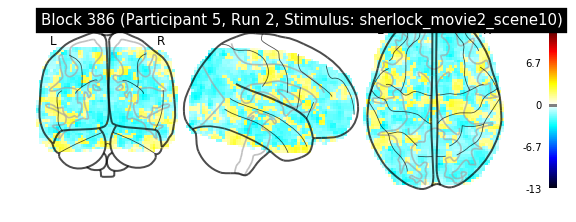

06/18/2018 12:40:56 Reconstruction Error (Frobenius Norm): 1.39117224e+03 out of 1.39632336e+03


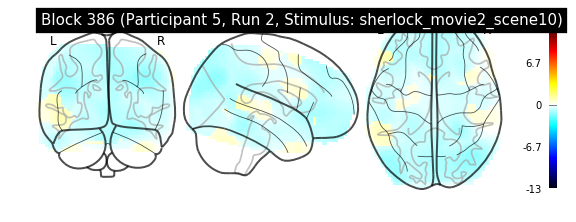

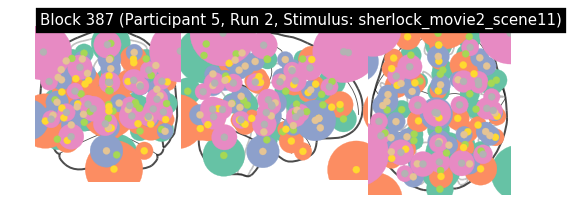

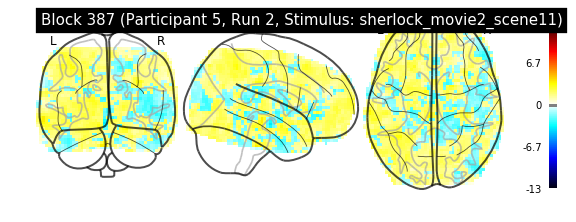

06/18/2018 12:41:13 Reconstruction Error (Frobenius Norm): 2.51933252e+03 out of 2.50156982e+03


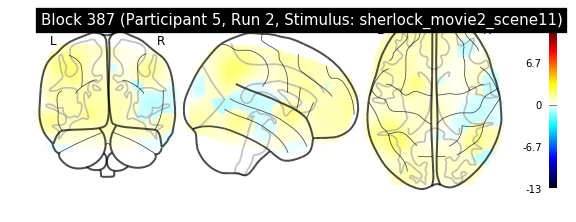

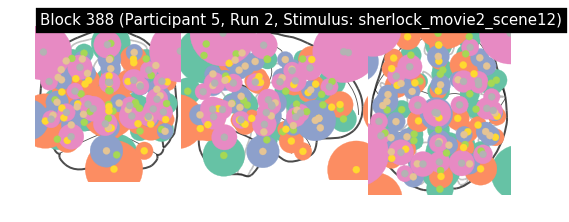

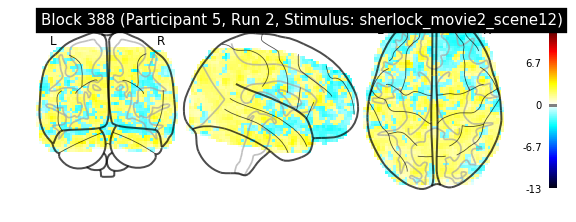

06/18/2018 12:41:20 Reconstruction Error (Frobenius Norm): 1.86318665e+03 out of 1.85622681e+03


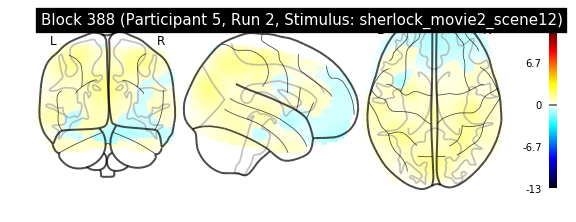

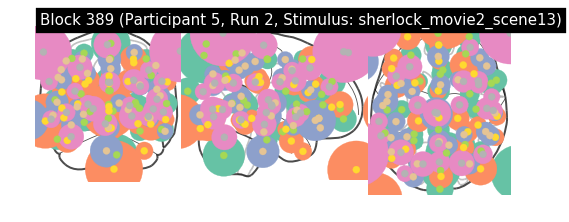

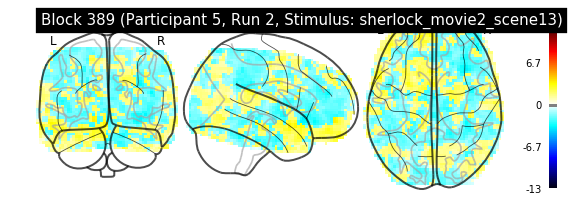

06/18/2018 12:41:30 Reconstruction Error (Frobenius Norm): 1.87198572e+03 out of 1.86058179e+03


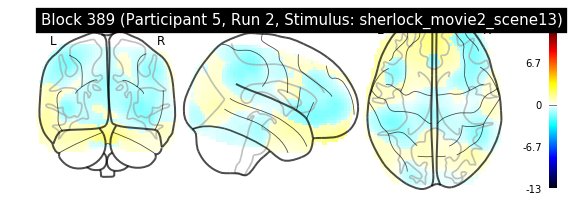

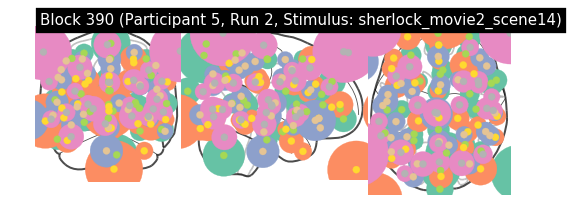

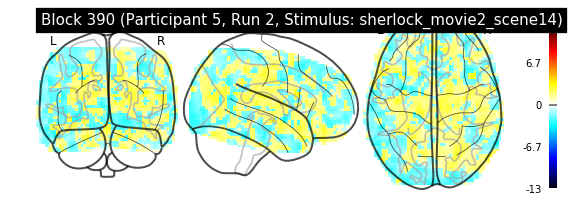

06/18/2018 12:41:36 Reconstruction Error (Frobenius Norm): 1.10759692e+03 out of 1.16560449e+03


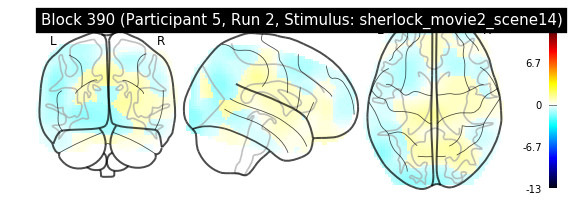

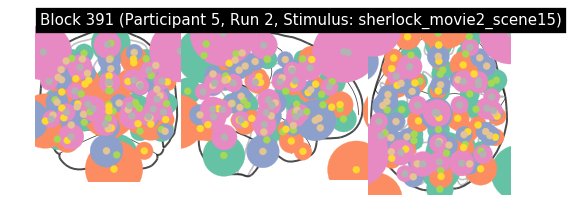

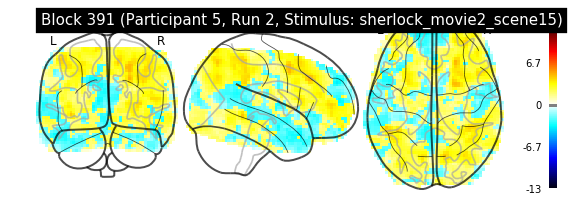

06/18/2018 12:41:40 Reconstruction Error (Frobenius Norm): 6.63927185e+02 out of 7.82902161e+02


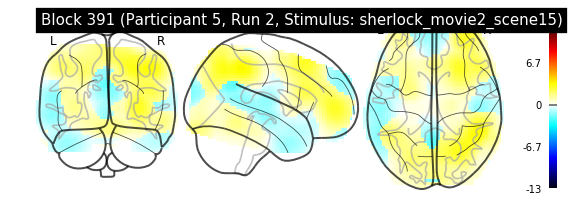

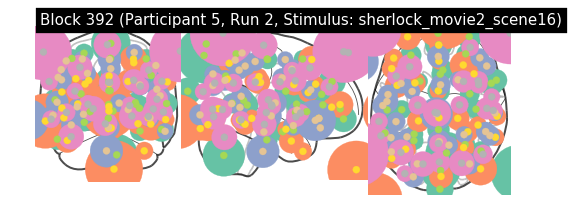

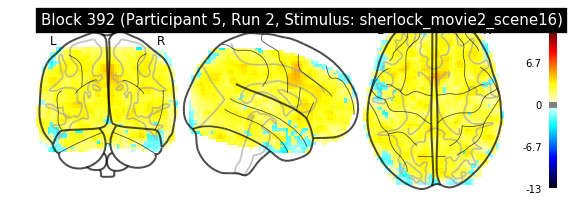

06/18/2018 12:41:48 Reconstruction Error (Frobenius Norm): 1.47919678e+03 out of 1.57620386e+03


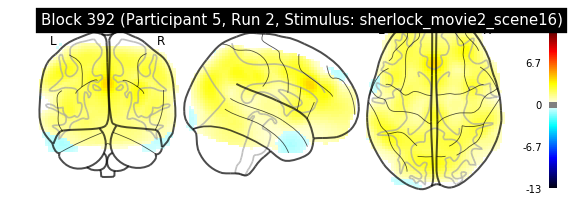

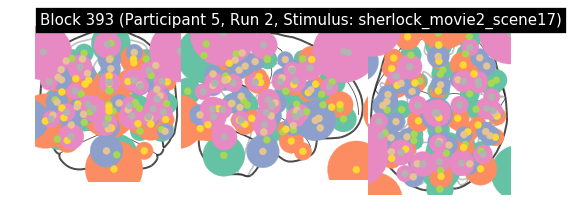

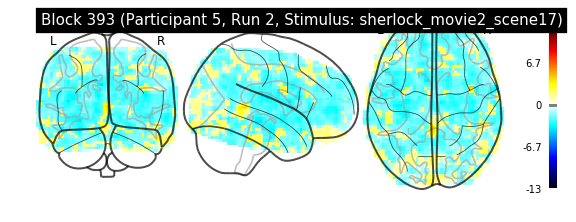

06/18/2018 12:41:54 Reconstruction Error (Frobenius Norm): 1.09853320e+03 out of 1.16429993e+03


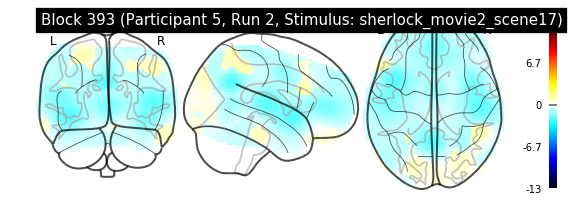

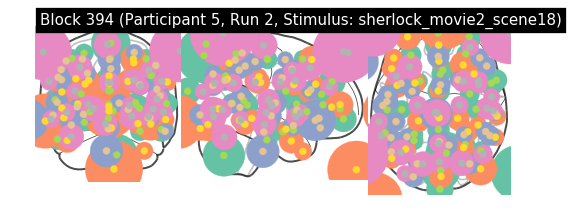

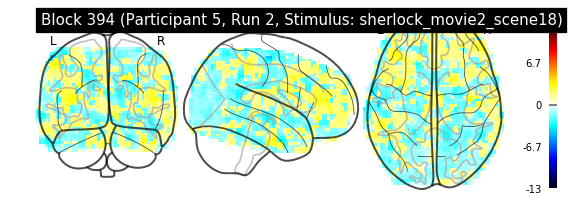

06/18/2018 12:42:03 Reconstruction Error (Frobenius Norm): 1.70809277e+03 out of 1.71657495e+03


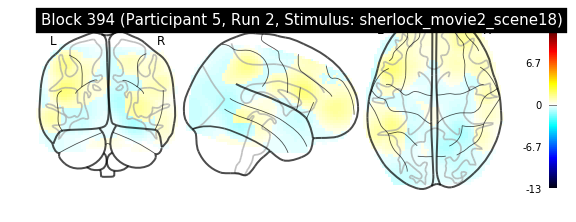

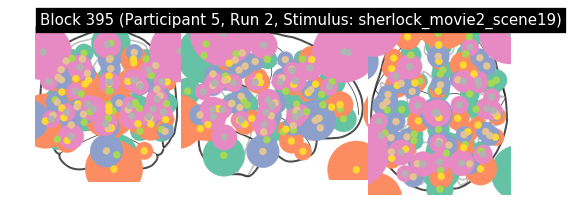

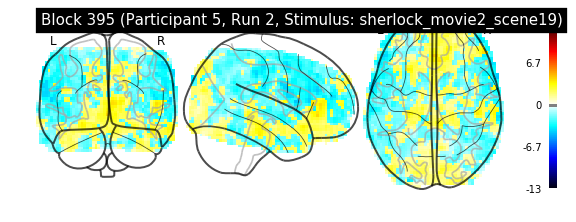

06/18/2018 12:42:08 Reconstruction Error (Frobenius Norm): 1.73700830e+03 out of 1.81615344e+03


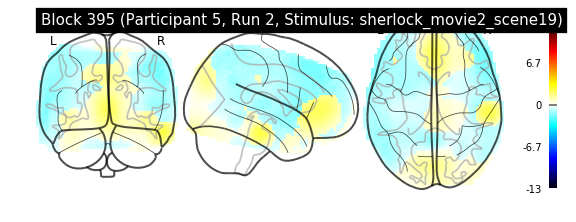

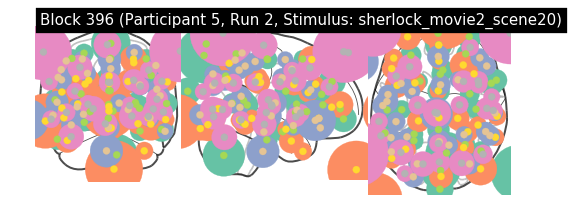

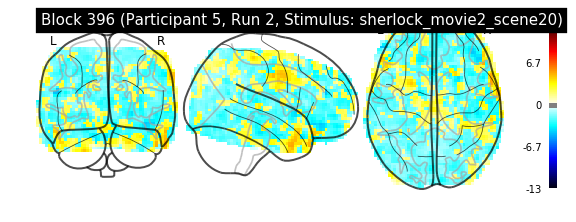

06/18/2018 12:42:16 Reconstruction Error (Frobenius Norm): 1.95856494e+03 out of 2.10113062e+03


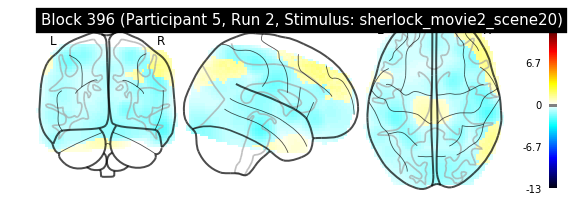

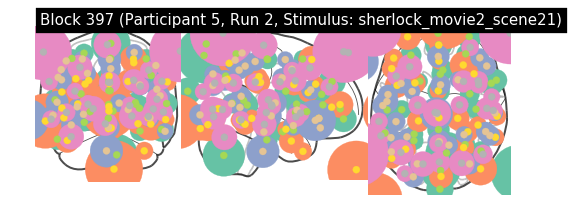

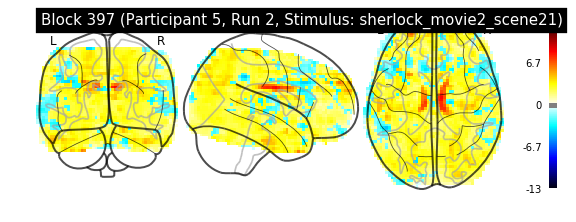

06/18/2018 12:42:25 Reconstruction Error (Frobenius Norm): 2.01639478e+03 out of 2.17381323e+03


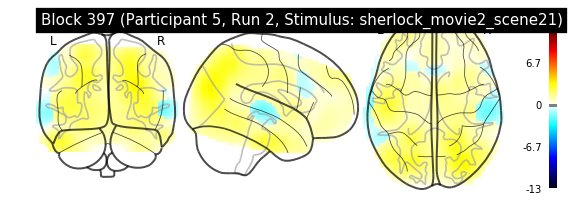

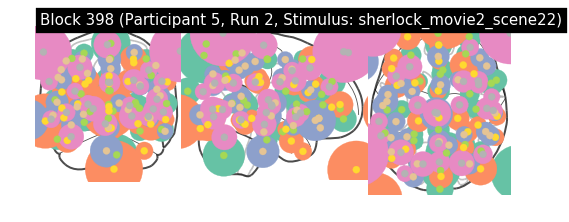

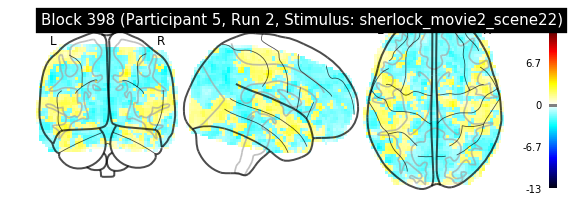

06/18/2018 12:42:33 Reconstruction Error (Frobenius Norm): 1.32736047e+03 out of 1.33918665e+03


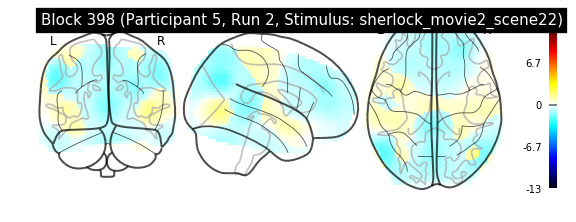

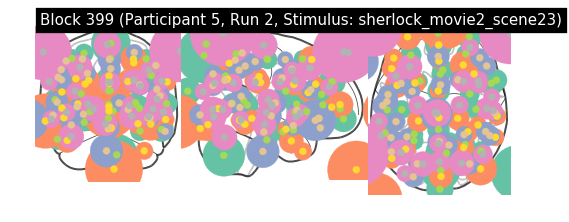

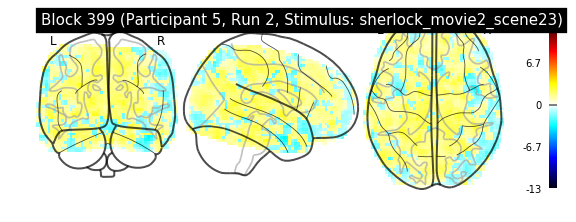

06/18/2018 12:42:40 Reconstruction Error (Frobenius Norm): 1.09562390e+03 out of 1.18339917e+03


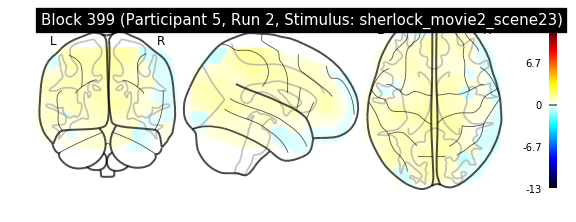

In [9]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=task_labeler)
        dtfa.plot_original_brain(index, labeler=task_labeler)
        dtfa.plot_reconstruction(index, labeler=task_labeler)


/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


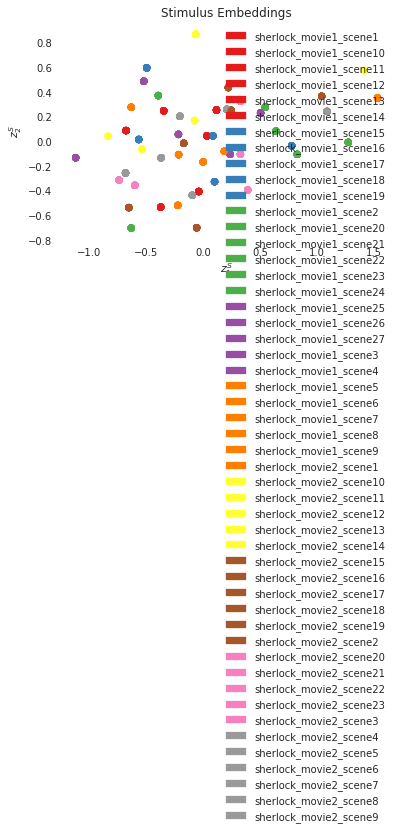

In [10]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [11]:
def subject_labeler(block):
    return 'Subject %d' % block.subject

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


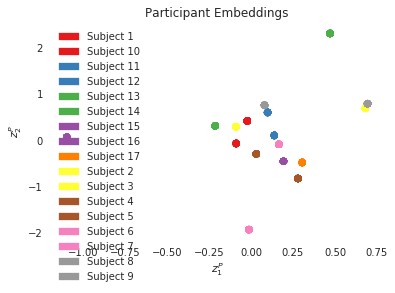

In [12]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

In [13]:
dtfa.decoding_accuracy()

sherlock_movie2_scene23


/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:363: RuntimeWarning: divide by zero encountered in log
  return 0.5 * (np.log(1 + r) - np.log(1 - r))
/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:394: RuntimeWarning: invalid value encountered in add
  isfc_mat[n, :] = isfc_mat[n, :] + vectorize(next_corrs + next_corrs.T)
/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:366: RuntimeWarning: invalid value encountered in true_divide
  return (np.exp(2 * z) - 1) / (np.exp(2 * z) + 1)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


sherlock_movie1_scene20
sherlock_movie2_scene11
sherlock_movie1_scene6
sherlock_movie1_scene27
sherlock_movie2_scene10
sherlock_movie1_scene8
sherlock_movie1_scene23
sherlock_movie2_scene15
sherlock_movie2_scene8
sherlock_movie1_scene10
sherlock_movie1_scene5
sherlock_movie2_scene16
sherlock_movie1_scene17
sherlock_movie1_scene18
sherlock_movie1_scene19
sherlock_movie1_scene25
sherlock_movie2_scene4
sherlock_movie2_scene22
sherlock_movie1_scene12
sherlock_movie1_scene22
sherlock_movie2_scene2
sherlock_movie1_scene7
sherlock_movie1_scene24
sherlock_movie1_scene1
sherlock_movie2_scene1
sherlock_movie2_scene14
sherlock_movie2_scene18
sherlock_movie1_scene13
sherlock_movie1_scene2
sherlock_movie2_scene7
sherlock_movie1_scene15
sherlock_movie1_scene4
sherlock_movie2_scene21
sherlock_movie2_scene17
sherlock_movie1_scene21
sherlock_movie2_scene13
sherlock_movie1_scene11
sherlock_movie2_scene12
sherlock_movie1_scene9
sherlock_movie2_scene5
sherlock_movie2_scene19
sherlock_movie2_scene6
sherloc

{'sherlock_movie1_scene1': {'isfc': [array([0.        , 0.        , 0.04545455, 0.        , 0.04545455,
          0.        , 0.04545455, 0.        , 0.04545455])],
  'kl': [array([0.22727273, 0.04545455, 0.13636364, 0.04545455, 0.        ,
          0.04545455, 0.        , 0.04545455, 0.        ])],
  'mixed': [array([0.        , 0.        , 0.04545455, 0.        , 0.04545455,
          0.        , 0.04545455, 0.        , 0.04545455])],
  'node': [array([0.27272727, 0.09090909, 0.04545455, 0.04545455, 0.        ,
          0.04545455, 0.        , 0.04545455, 0.        ])]},
 'sherlock_movie1_scene10': {'isfc': [array([0.        , 0.        , 0.06666667, 0.        , 0.06666667,
          0.        , 0.06666667, 0.        , 0.06666667])],
  'kl': [array([0.2       , 0.13333333, 0.06666667, 0.06666667, 0.13333333,
          0.06666667, 0.06666667, 0.06666667, 0.        ])],
  'mixed': [array([0.        , 0.        , 0.06666667, 0.        , 0.06666667,
          0.        , 0.06666667, 0.